In [262]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [263]:
csv_link="../dataset/new_sample.csv"

In [264]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [265]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataframe=scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(dataframe, columns = ['white','olive','dark_brown','summer','winter','autumn','spring','r1','g1','b1','r2','g2','b2','r3','g3','b3','r4','g4','b4'])

In [266]:
dataframe.head()

,white,olive,dark_brown,summer,winter,autumn,spring,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.936,0.465306,0.537190,0.984252,0.909091,0.949153,0.713725,0.911290,0.827451,0.847059,0.679654,0.725410
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.908,0.693878,0.710744,0.937008,0.834711,0.894068,0.643137,0.592742,0.576471,0.403922,0.341991,0.385246
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.984,0.902041,0.768595,0.708661,0.975207,0.847458,0.627451,0.931452,0.898039,1.000000,0.709957,0.770492
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.236735,0.338843,0.094488,0.586777,0.762712,0.458824,0.927419,0.854902,0.831373,1.000000,1.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.904,0.816327,0.793388,0.728346,0.706612,0.800847,0.525490,0.560484,0.556863,0.933333,0.982684,0.946721


In [267]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r1','g1','b1','r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [268]:
target_sequence

,r1,g1,b1
0,0.936,0.465306,0.537190
1,0.908,0.693878,0.710744
2,0.984,0.902041,0.768595
3,0.000,0.236735,0.338843
4,0.904,0.816327,0.793388
5,0.000,0.000000,0.148760
6,0.708,0.534694,0.214876
7,0.060,0.338776,0.611570
8,0.168,0.951020,0.876033
9,0.224,0.306122,0.000000


In [269]:
X = np.reshape(input_sequence, (-1,7))
y = np.reshape(target_sequence, (-1,12))


In [270]:
X


array([[1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
 

In [271]:
y

array([[0.936     , 0.46530612, 0.53719008],
       [0.908     , 0.69387755, 0.7107438 ],
       [0.984     , 0.90204082, 0.76859504],
       [0.        , 0.23673469, 0.33884298],
       [0.904     , 0.81632653, 0.79338843],
       [0.        , 0.        , 0.14876033],
       [0.708     , 0.53469388, 0.21487603],
       [0.06      , 0.33877551, 0.61157025],
       [0.168     , 0.95102041, 0.87603306],
       [0.224     , 0.30612245, 0.        ],
       [0.964     , 0.93061224, 0.87603306],
       [0.72      , 0.54693878, 0.5661157 ],
       [0.24      , 0.4244898 , 0.60743802],
       [0.904     , 0.94693878, 0.97520661],
       [0.732     , 0.92244898, 0.87603306],
       [0.892     , 0.8244898 , 0.7768595 ],
       [1.        , 0.75102041, 0.77272727],
       [0.728     , 0.90204082, 1.        ],
       [0.828     , 0.53061224, 0.41322314],
       [1.        , 0.95510204, 0.73140496],
       [0.928     , 0.90204082, 0.85950413],
       [0.364     , 0.21632653, 0.52479339],
       [0.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [273]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(32, input_shape=(7,),activation='relu'),
   
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
   
   
    tf.keras.layers.Dense(target_sequence.shape[1])  
  ])

In [274]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [275]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 32)                256       
                                                                 
 dense_96 (Dense)            (None, 32)                1056      
                                                                 
 dense_97 (Dense)            (None, 64)                2112      
                                                                 
 dense_98 (Dense)            (None, 128)               8320      
                                                                 
 dense_99 (Dense)            (None, 64)                8256      
                                                                 
 dense_100 (Dense)           (None, 3)                 195       
                                                                 
Total params: 20,195
Trainable params: 20,195
Non-tra

In [276]:
# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=10,
                    verbose=1,validation_data=(X_test,y_test))



Epoch 1/100
3/3 [==============================] - 1s 66ms/step - loss: 0.5144 - accuracy: 0.5000 - val_loss: 0.4837 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4487 - accuracy: 0.5385 - val_loss: 0.4195 - val_accuracy: 0.4286
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3898 - accuracy: 0.5769 - val_loss: 0.3415 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3176 - accuracy: 0.5000 - val_loss: 0.2539 - val_accuracy: 0.2857
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2390 - accuracy: 0.3846 - val_loss: 0.1662 - val_accuracy: 0.2857
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1615 - accuracy: 0.3846 - val_loss: 0.1001 - val_accuracy: 0.2857
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1053 - accuracy: 0.3846 - val_loss: 0.0918 - val_accuracy: 0.2857
Epoch 8/100
3/3 [===

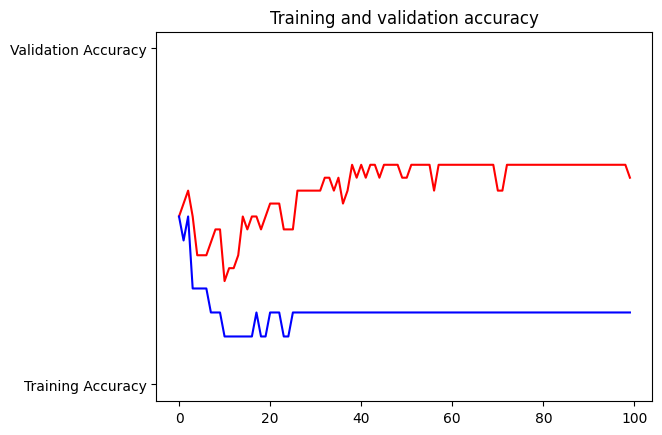

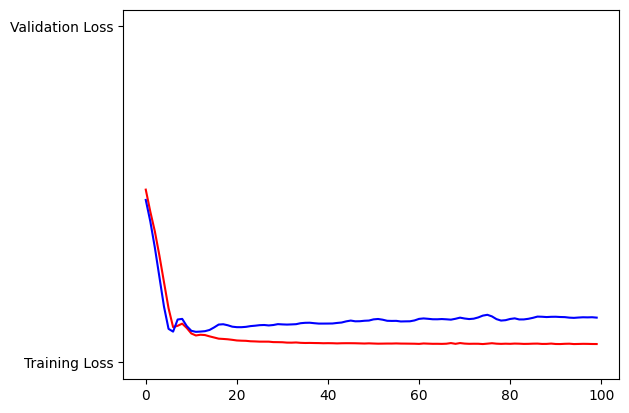

In [277]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [278]:
dara=[[1,0,0,1,1,0,0]]


test_input = np.array(dara)
scaled_input=scaler.fit_transform(dara)
predictions = model.predict(scaled_input)
predictions= predictions*255
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 55ms/step
[[74.76429  88.76046  80.946945]]


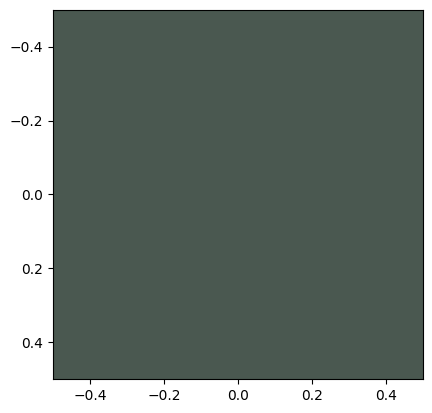

TypeError: Invalid shape (1, 1, 0) for image data

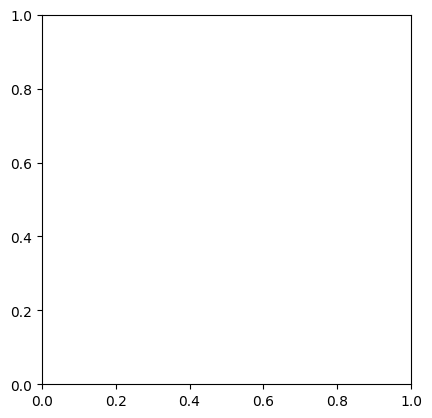

In [279]:


plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()